In [34]:
import os
os.chdir('/home/zzy/robot/robot_zzy/diffusion_policy')
import hydra
d = {'_target_': 'diffusion_policy.dataset.robomimic_replay_image_dataset.RobomimicReplayImageDataset', 
     'shape_meta': {'obs': {'agentview_image': {'shape': [3, 84, 84], 'type': 'rgb'}, 
                            'robot0_eye_in_hand_image': {'shape': [3, 84, 84], 'type': 'rgb'}, 
                            'robot0_eef_pos': {'shape': [3]}, 
                            'robot0_eef_quat': {'shape': [4]}, 
                            'robot0_gripper_qpos': {'shape': [2]}}, 
                    'action': {'shape': [7]}}, 
     'dataset_path': '/home/zzy/robot/data/robomimic_data/robomimic/datasets/lift/ph/image_abs.hdf5', 
     'horizon': 16, 
     'pad_before': 0, 
     'pad_after': 15, 
     'n_obs_steps': 60, 
     'abs_action': False, 
     'rotation_rep': 'rotation_6d', 
     'use_legacy_normalizer': False, 
     'use_cache': False, 
     'seed': 42, 
     'val_ratio': 0.02}
import zzy_utils
# zzy_utils.pretty_print(d)
dataset = hydra.utils.instantiate(d)
print(dataset)

Loading image data: 100%|██████████| 19332/19332 [00:06<00:00, 3117.12it/s]

In [35]:
import zzy_utils
import numpy as np
# zzy_utils.pretty_print(dataset[0])
# zzy_utils.visualize_time_series_data(np.concatenate((dataset[0]['action'], dataset[1]['action']), 0), 0)
# zzy_utils.visualize_images(dataset[0]['obs']['agentview_image'], resize_shape=(224, 224), fps=20)
# zzy_utils.visualize_images(dataset[1]['obs']['agentview_image'], resize_shape=(224, 224), fps=20)
# zzy_utils.visualize_image_notebook(dataset[0]['obs']['agentview_image'][0], resize_shape=(224, 224))
# zzy_utils.visualize_images(dataset[0]['obs']['agentview_image'], resize_shape=(224, 224))
# zzy_utils.pretty_print(dataset[0])
# zzy_utils.visualize_time_series_data(dataset[0]['action'], 0)
# print(dataset[0]['action'])
# print(dataset[1]['action'].shape)
# list(dataset.replay_buffer.episode_ends)
for element in dataset[0]['action'].numpy().tolist():
    print(element)
for i in range(1, 59):
    print(dataset[i]['action'][-1].numpy().tolist())
# for i in range(59):
#     if not bool((dataset[i]['action'][1:] == dataset[i+1]['action'][:-1]).all()):
#         print(i)
#         print(dataset[i]['action'])
#         print(dataset[i+1]['action'])
#         break

[-0.09553170949220657, 0.023486949503421783, 1.0269900560379028, 2.0956575870513916, 2.2569260597229004, 0.10422980785369873, -1.0]
[-0.08377934992313385, -0.008690964430570602, 1.006715178489685, 2.1954686641693115, 2.1779165267944336, 0.07331305742263794, -1.0]
[-0.07955745607614517, -0.004755155649036169, 1.0048738718032837, 2.204448699951172, 2.178776502609253, 0.06705611199140549, -1.0]
[-0.06984850764274597, 0.00046107996604405344, 0.9970270991325378, 2.217437744140625, 2.174269914627075, 0.0602152943611145, -1.0]
[-0.06762557476758957, 0.007208902854472399, 0.988520085811615, 2.230944871902466, 2.1636080741882324, 0.05553518608212471, -1.0]
[-0.05591428279876709, 0.008162534795701504, 0.9868593215942383, 2.2425901889801025, 2.1550679206848145, 0.045180972665548325, -1.0]
[-0.050486478954553604, 0.010860070586204529, 0.981778621673584, 2.2580010890960693, 2.143338441848755, 0.04095336049795151, -1.0]
[-0.039064064621925354, 0.016292840242385864, 0.9782708287239075, 2.271270513534

In [10]:
zzy_utils.visualize_images(dataset[0]['obs']['agentview_image'], resize_shape=(224, 224), verbose=False, fps=20)
zzy_utils.visualize_images(dataset[20]['obs']['agentview_image'], resize_shape=(224, 224), verbose=False, fps=20)

In [26]:
from pathlib import Path
import pickle
action_path = Path('/home/zzy/robot/robot_zzy/diffusion_policy/diffusion_policy/env_runner/env_actions.pkl')
with action_path.open('rb') as f:
    env_actions = pickle.load(f)
    # env_actions = np.concatenate(env_actions, axis=1)[0]
env_actions['qpos'] = dataset[0]['action'].numpy()
zzy_utils.pretty_print(env_actions)
# write back
# with action_path.open('wb') as f:
#     pickle.dump(env_actions, f)

{
    "abs":
        array((104, 7), float32)
    "qpos":
        array((60, 7), float32)
}



{
    "abs":
        array((104, 7), float32)
}



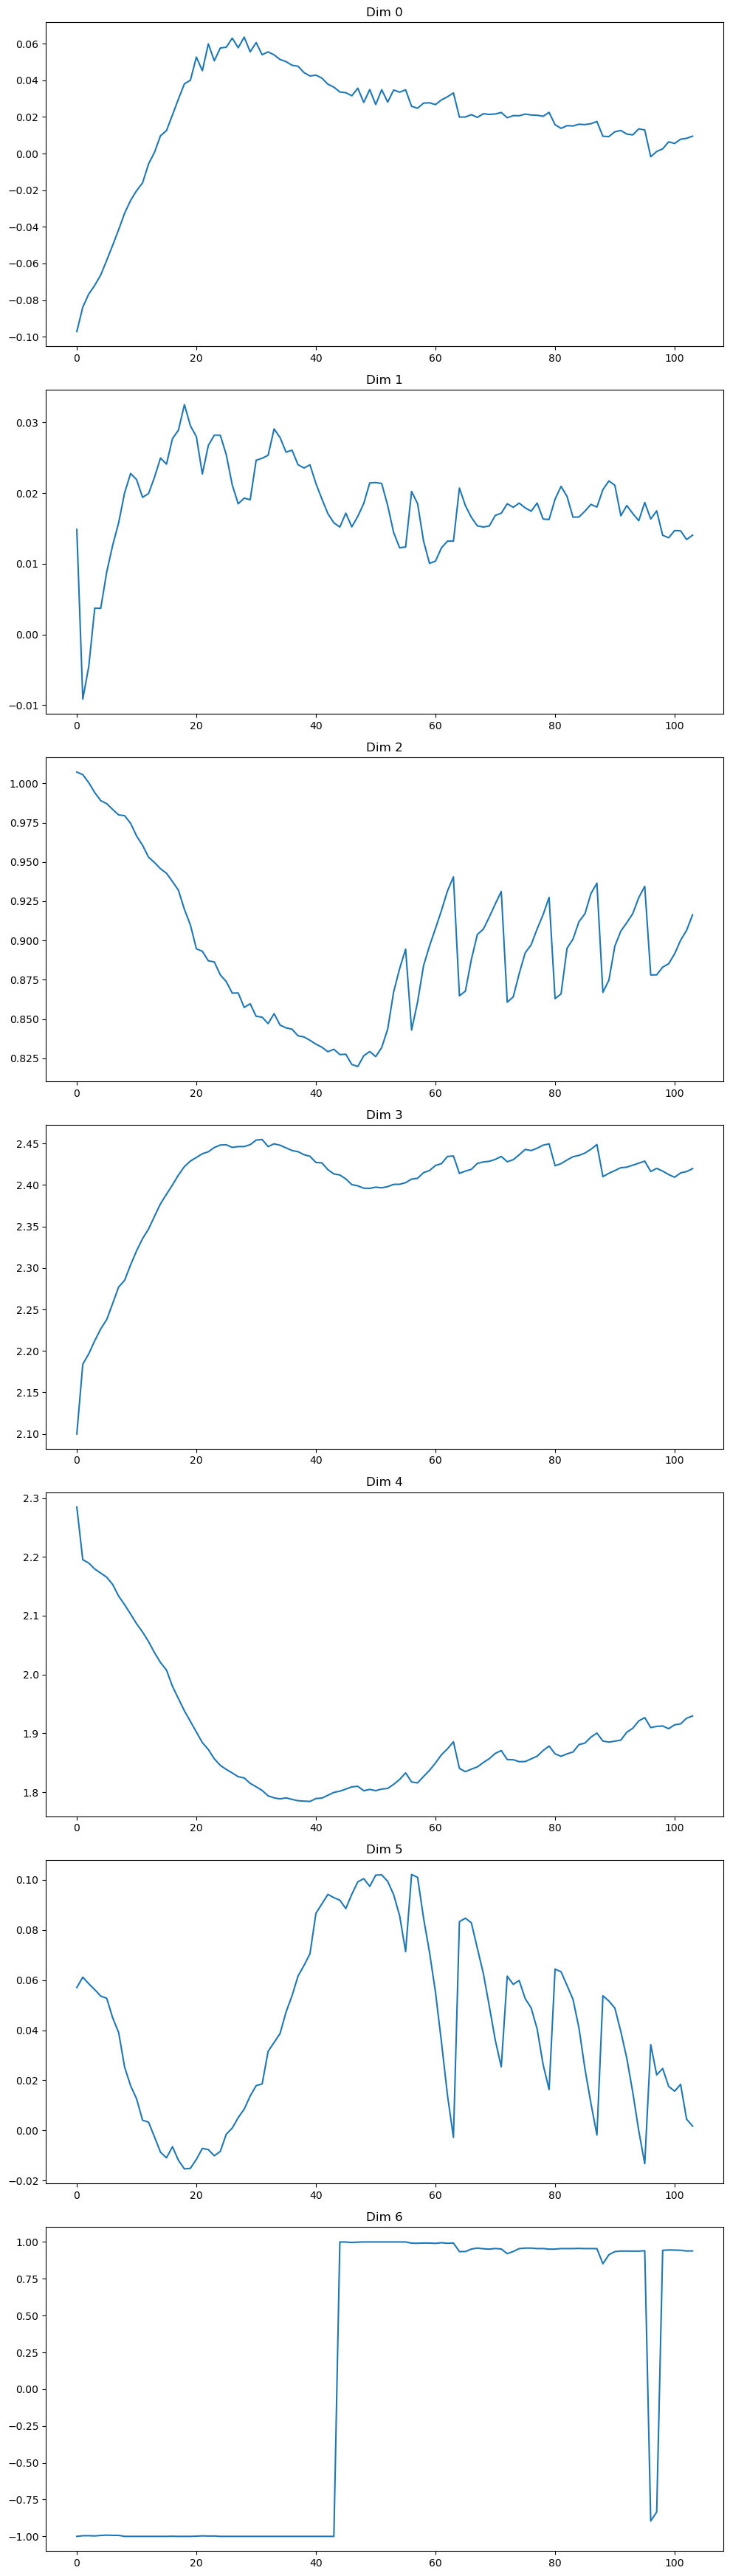

In [11]:
from pathlib import Path
import pickle
import numpy as np
action_path = Path('/home/zzy/robot/robot_zzy/diffusion_policy/diffusion_policy/env_runner/env_actions.pkl')
with action_path.open('rb') as f:
    env_actions = pickle.load(f)
    # env_actions = np.concatenate(env_actions, axis=1)[0]
zzy_utils.pretty_print(env_actions)
# import zzy_utils
# zzy_utils.pretty_print(env_actions)
zzy_utils.visualize_time_series_data(env_actions["abs"], 0)
# env_actions = {'abs': env_actions}
# with action_path.open('wb') as f:
#     pickle.dump(env_actions, f)

In [5]:
import numpy as np
# print(np.round(dataset[0]['action'].numpy(), 3))
normalizer = dataset.get_normalizer()

zzy_utils.plot_time_series_data(dataset[0]['action'], 0)
zzy_utils.plot_time_series_data(normalizer['action'](dataset[0]['action']), 0)

AttributeError: module 'zzy_utils' has no attribute 'plot_time_series_data'

In [ ]:
print(np.round(dataset[0]['obs']['robot0_eef_pos'].numpy(), 3))
# print(np.round(dataset[0]['obs']['robot0_eef_quat'].numpy(), 3))
# print(np.round(dataset[0]['obs']['robot0_gripper_qpos'].numpy(), 3))

[[-1.060e-01  1.400e-02  1.004e+00]
 [-1.040e-01  1.200e-02  1.003e+00]
 [-9.900e-02  8.000e-03  9.990e-01]
 [-9.200e-02  5.000e-03  9.940e-01]
 [-8.500e-02  3.000e-03  9.880e-01]
 [-7.800e-02  2.000e-03  9.820e-01]
 [-7.200e-02  2.000e-03  9.760e-01]
 [-6.700e-02  2.000e-03  9.700e-01]
 [-6.100e-02  3.000e-03  9.650e-01]
 [-5.600e-02  3.000e-03  9.600e-01]
 [-5.100e-02  3.000e-03  9.560e-01]
 [-4.600e-02  3.000e-03  9.510e-01]
 [-4.100e-02  3.000e-03  9.470e-01]
 [-3.600e-02  2.000e-03  9.420e-01]
 [-3.000e-02  1.000e-03  9.370e-01]
 [-2.500e-02  0.000e+00  9.310e-01]
 [-2.000e-02  0.000e+00  9.250e-01]
 [-1.700e-02  1.000e-03  9.200e-01]
 [-1.500e-02  1.000e-03  9.150e-01]
 [-1.200e-02  0.000e+00  9.100e-01]
 [-8.000e-03 -1.000e-03  9.040e-01]
 [-4.000e-03 -3.000e-03  8.980e-01]
 [ 0.000e+00 -4.000e-03  8.920e-01]
 [ 3.000e-03 -5.000e-03  8.860e-01]
 [ 7.000e-03 -5.000e-03  8.810e-01]
 [ 9.000e-03 -5.000e-03  8.760e-01]
 [ 1.100e-02 -6.000e-03  8.720e-01]
 [ 1.200e-02 -7.000e-03  8.6

In [1]:
import torch
import dill
import zzy_utils
path = '/home/zzy/robot/data/diffusion_policy_data/data/outputs/2024.07.25/07.16.55_train_ae_lift_lowdim/checkpoints/latest.ckpt'
ckpt = torch.load(path, pickle_module=dill)
zzy_utils.pretty_print(ckpt)
# print(ckpt['state_dict'].keys())
# print(ckpt['state_dict']['model.pl_model.encoder.encoder.0.weight'])


{
    "cfg":
        {'name': 'train_ae', '_target_': 'diffusion_policy.workspace.train_ae_workspace.TrainAEWorkspace', 'task_name': 'lift_lowdim', 'shape_meta': {'obs': {'robot0_eef_pos': {'shape': [3]}, 'robot0_eef_quat': {'shape': [4]}, 'robot0_gripper_qpos': {'shape': [2]}}, 'action': {'shape': [10]}}, 'exp_name': 'default', 'horizon': 16, 'n_obs_steps': 1, 'n_latency_steps': 0, 'dataset_obs_steps': 1, 'past_action_visible': False, 'n_action_steps': 8, 'use_image_input': False, 'use_language_input': False, 'seed': 3407, 'policy': {'_target_': 'diffusion_policy.policy.ae_policy.AEPolicy', 'sample_posterior': False, 'hidden_size': 128, 'latent_size': 32, 'n_encoder_layers': 3, 'n_decoder_layers': 3, 'n_heads': 8, 'horizon': 16, 'dropout': 0.1, 'lr': 0.0003, 'weight_decay': 0.0, 'warmup_steps': 1000, 'kl_weight': 0.001, 'shape_meta': {'obs': {'robot0_eef_pos': {'shape': [3]}, 'robot0_eef_quat': {'shape': [4]}, 'robot0_gripper_qpos': {'shape': [2]}}, 'action': {'shape': [10]}}}, 'datam

In [2]:
ckpt['cfg'].task.env_runner._target_ = 'diffusion_policy.env_runner.robomimic_image_runner_ae.RobomimicImageRunnerAE'
# ckpt['cfg'].task.env_runner['shape_meta'] = None
# ckpt['cfg'] = 
# ckpt['cfg'].with_merge({'test_ae_only': True})
type(ckpt['cfg'])
# new_cfg = ckpt['cfg'].with_merge({'test_ae_only': True})
# print(new_cfg)
import omegaconf
# new_cfg = omegaconf.OmegaConf.set(ckpt['cfg'], 'test_ae_only', True)
# print(new_cfg)
with omegaconf.flag_override(ckpt['cfg'], "struct", False):
    # ckpt['cfg'].test_ae_only = True
    ckpt['cfg'].task.env_runner['n_action_steps'] = 1
# print(ckpt['cfg'])

In [3]:
# save back
torch.save(ckpt, path, pickle_module=dill)

In [2]:
datamodule = ckpt.datamodule


AttributeError: 'dict' object has no attribute 'datamodule'